# Overlapping Null Models and Statistical Tests

In [55]:
import pandas as pd
import numpy as np

In [30]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')
a.saveas('tmp/fake_enhancers.bed')

<BedTool(tmp/fake_enhancers.bed)>

In [113]:
import random
from datetime import datetime

sample_bed = BedTool('tmp/fake_enhancers.bed')
b = sample_bed.shuffle(genome='hg19', chrom=False)
print(a)
print("after shuffle:\n")
print(b) 

# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 1000
# Number of possible intervals (estimated): 1813917
# phyper(1000 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1000         | 41001        |
# not in -a | 42010        | 1729906      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.56134	0.45147	0.88391	1.004

after shuffle:

chr17	26613177	26613276	feature1	0	+
chr10	79882099	79882199	feature2	0	+
chr6_dbb_hap3	3653343	3653693	feature3	0	-
chr4	187675070	187675120	feature4	0	+



In [111]:
encode_bed = BedTool('tmp/T-cell_ENCODE_sample.bed')
fantom_bed = BedTool('tmp/permissive_enhancers.bed')

In [33]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def std_size(bed):
    return int(round(sample_df[['size']].std()))


In [34]:
mean_size(fantom_bed)

288

In [35]:
encode_bed_sorted = encode_bed.sort()
fantom_bed_sorted = fantom_bed.sort()

In [114]:
fantom_shuffled_bed = fantom_bed.shuffle(genome='hg19', chrom=False)
fantom_shuffled_bed_sorted = fantom_shuffled_bed.sort()
encode_shuffled_bed = encode_bed.shuffle(genome='hg19', chrom=False)
encode_shuffled_bed_sorted = encode_shuffled_bed.sort()

In [115]:
empty_bed = BedTool()
fantom_random_bed = empty_bed.random(l=mean_size(fantom_bed), n=len(fantom_bed), genome='hg19')
fantom_random_bed_sorted = fantom_random_bed.sort()

In [116]:
encode_bed_sorted.jaccard(fantom_shuffled_bed_sorted, f=0.50)

{'intersection': 14775,
 'jaccard': 0.000202935,
 'n_intersections': 74,
 'union-intersection': 72806482}

In [117]:
encode_bed_sorted.jaccard(encode_bed_sorted, f=0.50)

{'intersection': 60461879,
 'jaccard': 1.0,
 'n_intersections': 42001,
 'union-intersection': 60461879}

In [118]:
encode_bed_sorted.jaccard(fantom_bed_sorted, f=0.50)

{'intersection': 230499,
 'jaccard': 0.00317419,
 'n_intersections': 1000,
 'union-intersection': 72616569}

In [119]:
encode_bed_sorted.fisher(encode_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4857003592>
# Number of query intervals: 42001
# Number of db intervals: 42001
# Number of overlaps: 42001
# Number of possible intervals (estimated): 1088888
# phyper(42001 - 1, 42001, 1088888 - 42001, 42001, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 42001        | 0            |
# not in -a | 0            | 1046887      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	0	0	inf

In [120]:
encode_bed_sorted.fisher(fantom_shuffled_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4857003200>
# Number of query intervals: 42001
# Number of db intervals: 43006
# Number of overlaps: 74
# Number of possible intervals (estimated): 1813927
# phyper(74 - 1, 42001, 1813927 - 42001, 43006, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 74           | 41927        |
# not in -a | 42932        | 1728994      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	0.071

In [121]:
a = encode_bed_sorted.fisher(fantom_bed_sorted, f=0.50, genome='hg19')

In [122]:
a

<FisherOutput at 4751113464>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 1000
# Number of possible intervals (estimated): 1813917
# phyper(1000 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1000         | 41001        |
# not in -a | 42010        | 1729906      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.56134	0.45147	0.88391	1.004

In [123]:
import scipy.stats as stats
obs = [[1000, 41001], [42010, 1729906]]
oddsratio, pvalue = stats.fisher_exact(obs)
chi2 = stats.chi2_contingency(obs)
print("Fisher's oddsratio:", oddsratio, "pvalue:", pvalue)
print("Chi2:", chi2[0], "pvalue:", chi2[1])

Fisher's oddsratio: 1.00432754582 pvalue: 0.883911414896
Chi2: 0.0137163422923 pvalue: 0.906767505506


In [124]:
len(encode_bed_sorted)

42001

In [125]:
encode_bed_sorted.fisher(fantom_bed_sorted, f=0.10, genome='hg19')

<FisherOutput at 4766468584>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 4474
# Number of possible intervals (estimated): 1813917
# phyper(4474 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 4474         | 37527        |
# not in -a | 38536        | 1733380      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	5.363

In [126]:
sample_df = sample_bed.to_dataframe()
sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
int(round(sample_df[['size']].mean()))


150

In [127]:
len(sample_df)

4

## Fisher, Jaccard

In [128]:
def build_tests_df(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, 10):
        min_ovlp = i*0.1

        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [129]:
base_encyclopedia = 'ENCODE'
biosample_name = 'T-cell'
overlapping_encyclopedia = 'FANTOM'


tests_df = build_tests_df(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19')
tests_df_shuffled = build_tests_df(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'T-cell', 'hg19')
tests_df_random = build_tests_df(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'T-cell', 'hg19')

In [130]:
tests_df

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,fisher_left_p,fisher_right_p,fisher_two_p,fisher_oddsratio,jaccard
0,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.1,4474.0,0.000000e+00,1.000000e+00,0.000000e+00,5.363,0.022231
1,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.2,2529.0,0.000000e+00,1.000000e+00,0.000000e+00,2.740,0.012206
2,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.3,1654.0,1.000000e+00,1.495200e-85,2.449500e-85,1.715,0.007260
3,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.4,1216.0,1.000000e+00,2.565700e-12,4.610600e-12,1.234,0.004569
4,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.5,1000.0,5.613400e-01,4.514700e-01,8.839100e-01,1.004,0.003174
5,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.6,872.0,2.232800e-05,9.999800e-01,4.629100e-05,0.870,0.002448
6,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.7,777.0,9.617200e-14,1.000000e+00,1.897100e-13,0.772,0.001987
7,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.8,684.0,6.253500e-27,1.000000e+00,1.275700e-26,0.676,0.001643
8,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.9,578.0,6.777000e-49,1.000000e+00,1.305400e-48,0.569,0.001320


In [131]:
tests_df_random

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,fisher_left_p,fisher_right_p,fisher_two_p,fisher_oddsratio,jaccard
0,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.1,468.0,6.689000e-81,1.0,1.322600e-80,0.458,0.001521
1,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.2,215.0,1.333500e-204,1.0,2.304600e-204,0.208,0.000593
2,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.3,131.0,3.314900e-270,1.0,5.491600e-270,0.126,0.000299
3,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.4,104.0,9.413700e-296,1.0,2.319800e-295,0.100,0.000216
4,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.5,88.0,2.507600e-312,1.0,4.936200e-312,0.085,0.000174
5,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.6,77.0,0.000000e+00,1.0,0.000000e+00,0.074,0.000147
6,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.7,66.0,0.000000e+00,1.0,0.000000e+00,0.063,0.000132
7,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.8,58.0,0.000000e+00,1.0,0.000000e+00,0.056,0.000117
8,ENCODE,T-cell,FANTOM_random,42001.0,43011.0,0.9,48.0,0.000000e+00,1.0,0.000000e+00,0.046,0.000098


In [132]:
merged_tests_df = tests_df.append(tests_df_random).append(tests_df_shuffled)
merged_tests_df.reset_index(drop=True, inplace=True)
merged_tests_df['logp'] = -1*np.log(merged_tests_df['fisher_right_p'])

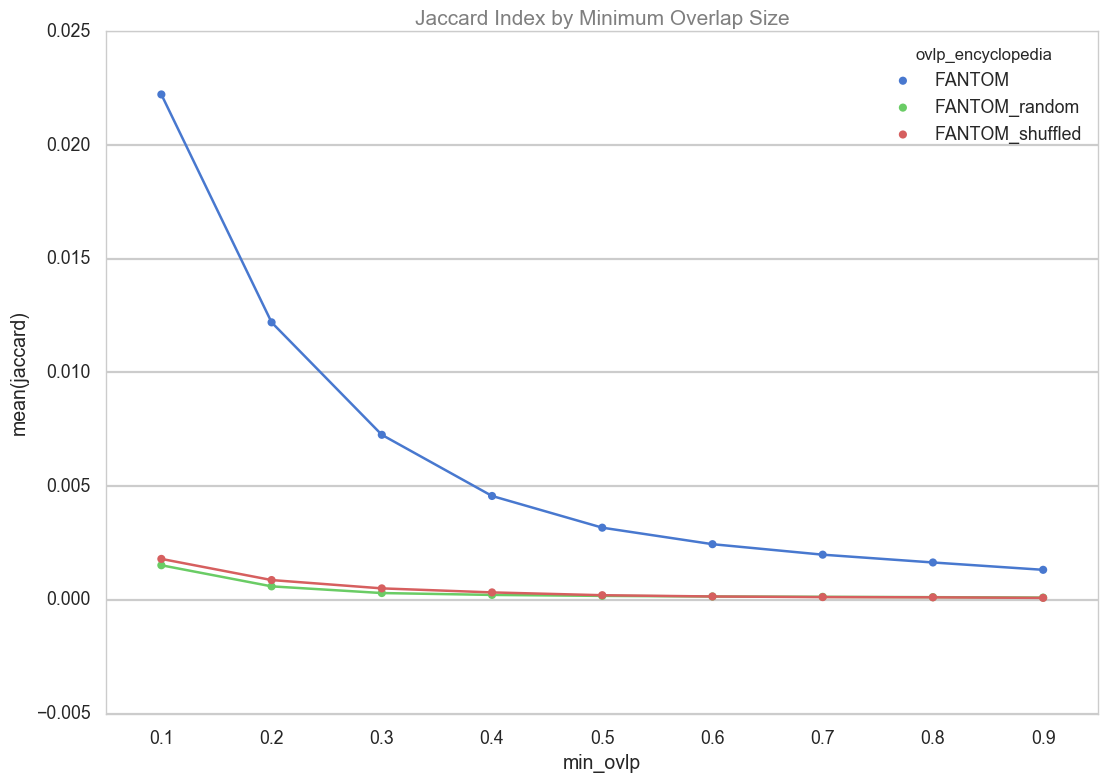

In [133]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

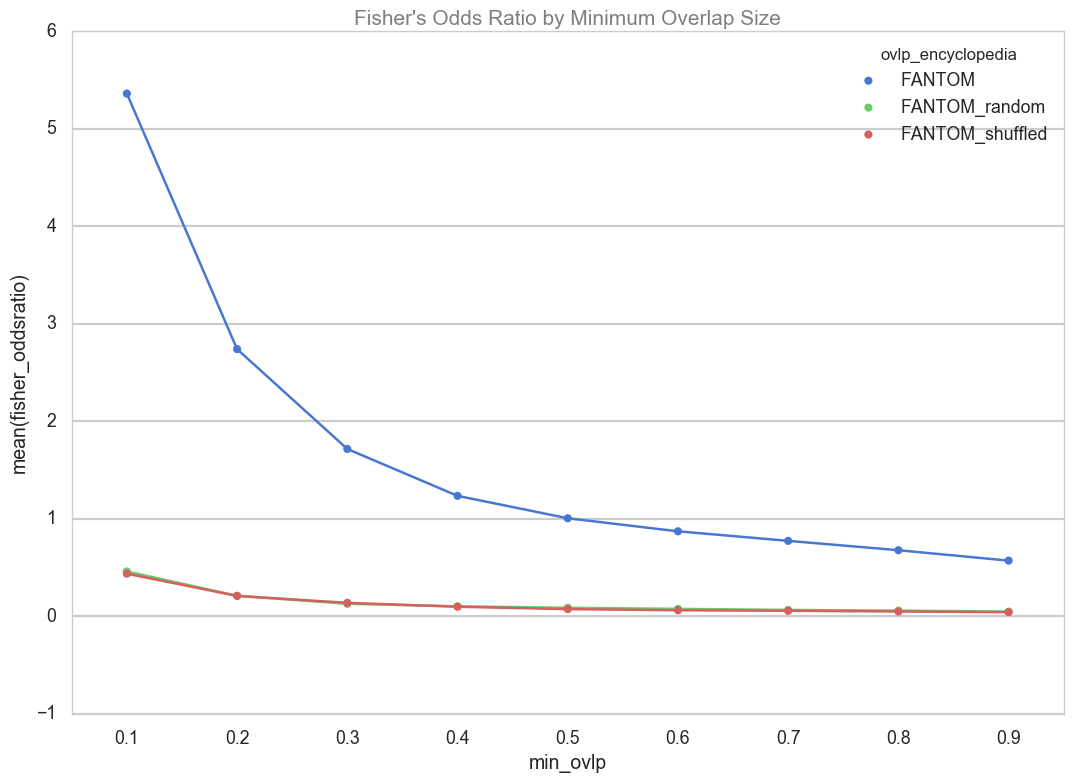

In [134]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_oddsratio", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Odds Ratio by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

(0, 200)

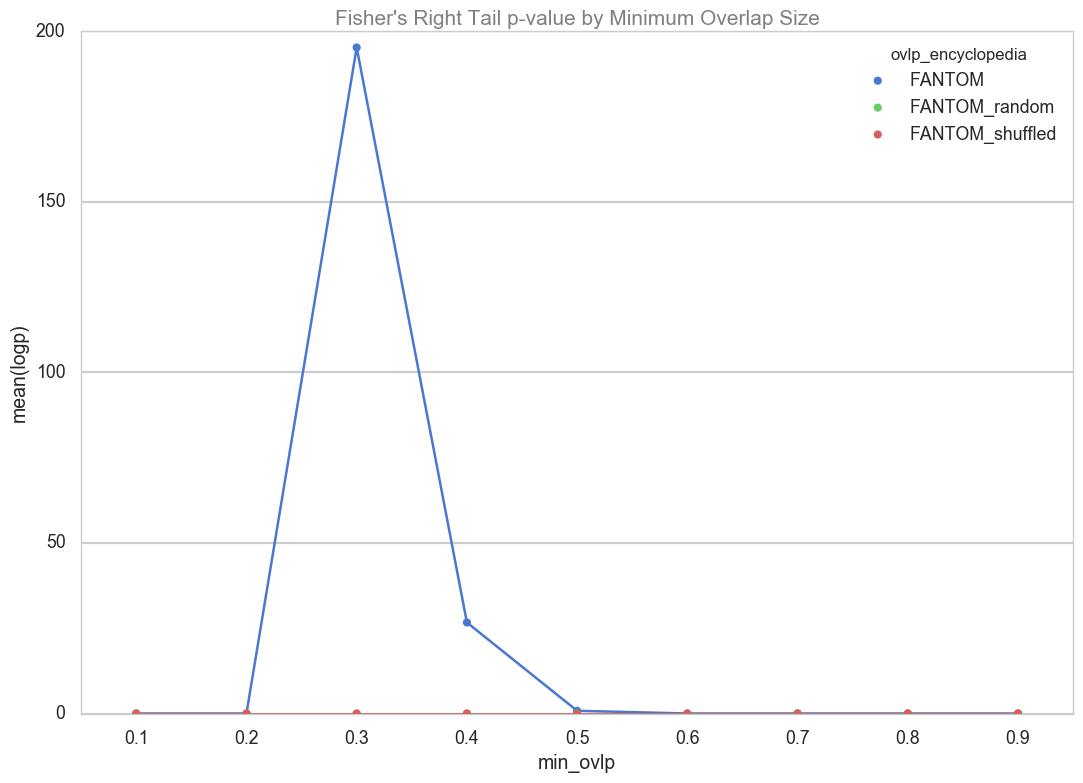

In [135]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
g.set_ylim(0, 200)
##TODO plottare -log(p-value)

(0, 1)

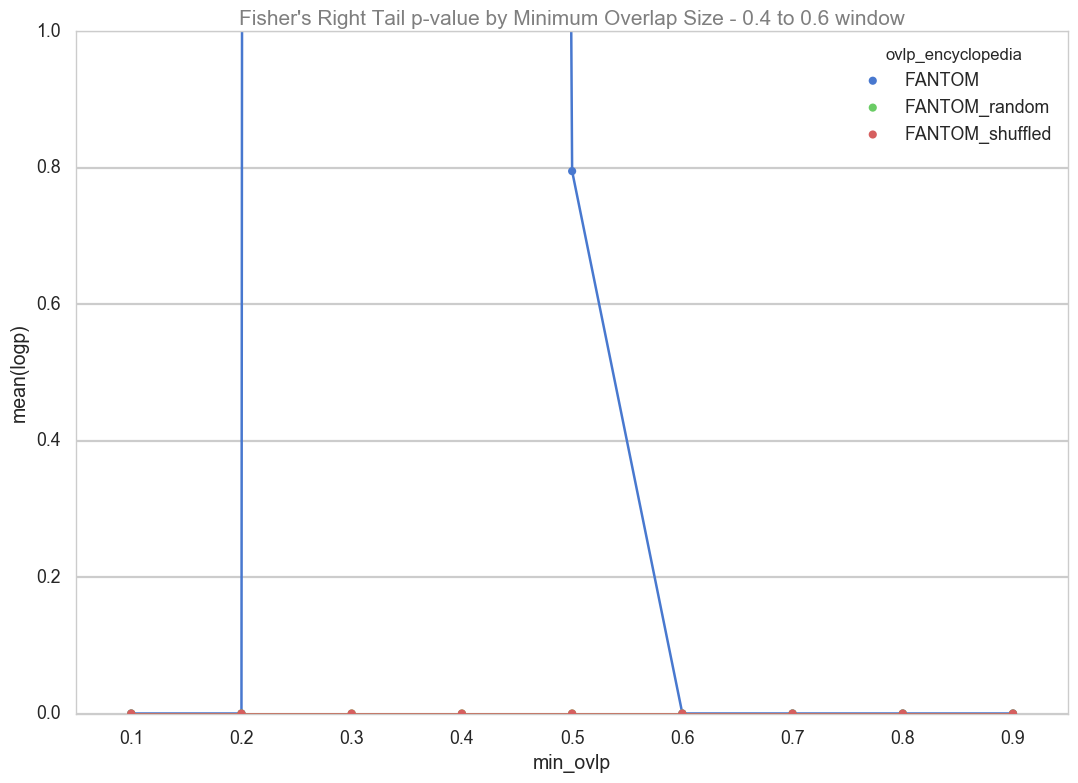

In [136]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size - 0.4 to 0.6 window', fontsize=15,color="black",alpha=0.5)
g.set_ylim(0, 1)


## Relative Distance

In [138]:
import pandas as pd
df_reldist = pd.DataFrame(encode_bed_sorted.reldist(fantom_bed_sorted))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,3191.000,1641.000,1325.000,1142.000,1057.000,1067.000,1000.000,889.000,894.000,868.000,...,701.000,660.000,680.000,685.000,678.000,698.000,657.000,663.000,652.000,690.000
fraction,0.076,0.039,0.032,0.027,0.025,0.025,0.024,0.021,0.021,0.021,...,0.017,0.016,0.016,0.016,0.016,0.017,0.016,0.016,0.016,0.016
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.400,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490
total,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,...,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000,41915.000


In [139]:
df_reldist_random = pd.DataFrame(encode_bed_sorted.reldist(fantom_shuffled_bed_sorted))
df_reldist_random = df_reldist_random[0:50]

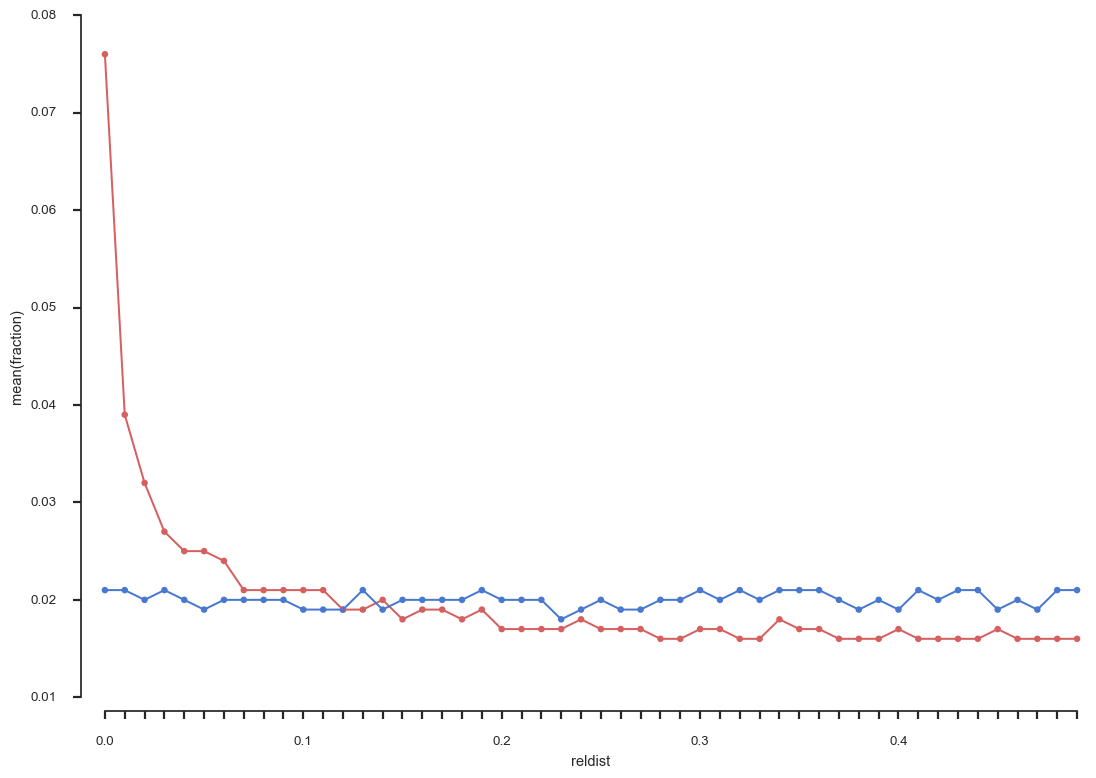

In [140]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        


## Z test

In [214]:
real_size = float(encode_bed.intersect(fantom_bed, f=0.8).count())
real_size

684.0

In [215]:
# create random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution(bed, bed_overlap_with, assembly, min_overlap, samples_num):  
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    for i in range(0, samples_num):
        empty_bed = BedTool()
        random_bed = empty_bed.random(l=mean_size(bed_overlap_with), n=bed_overlap_with.count(), 
                                      genome=assembly)
        row_array = [i, bed.intersect(random_bed, f=min_overlap).count()]
        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)
    return tests_df

In [216]:
runs_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.8, 100)

In [217]:
runs_df.T

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
size,41.0,45.0,40.0,55.0,57.0,54.0,65.0,45.0,45.0,47.0,...,49.0,46.0,49.0,48.0,49.0,52.0,48.0,31.0,62.0,50.0


In [218]:
random_mean_size = float(runs_df[['size']].mean())
random_std = float(runs_df[['size']].std())

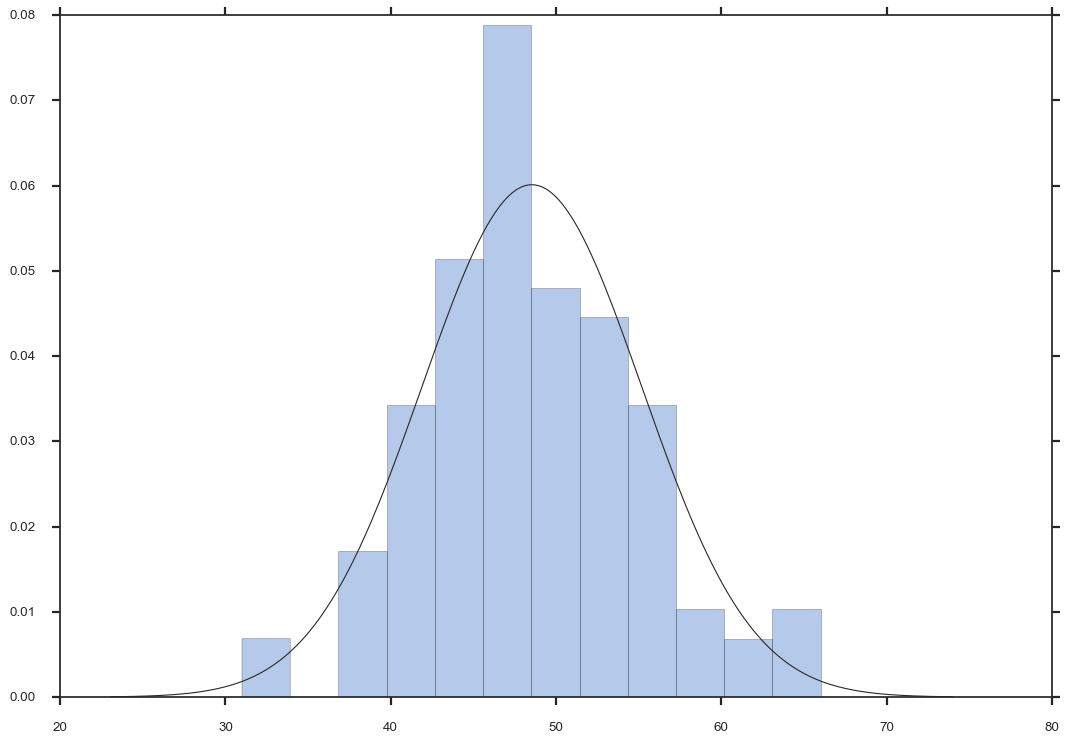

In [219]:
#sns.distplot(runs_df[['size']])
sns.distplot(runs_df[['size']], kde=False, fit=stats.norm)

In [220]:
z = (real_size - random_mean_size) / random_std

In [221]:
random_std

6.670385326504039